In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.isnull().sum().sum(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, None)

In [5]:
df = df.drop(['Unnamed: 32', 'id'], axis = 1)

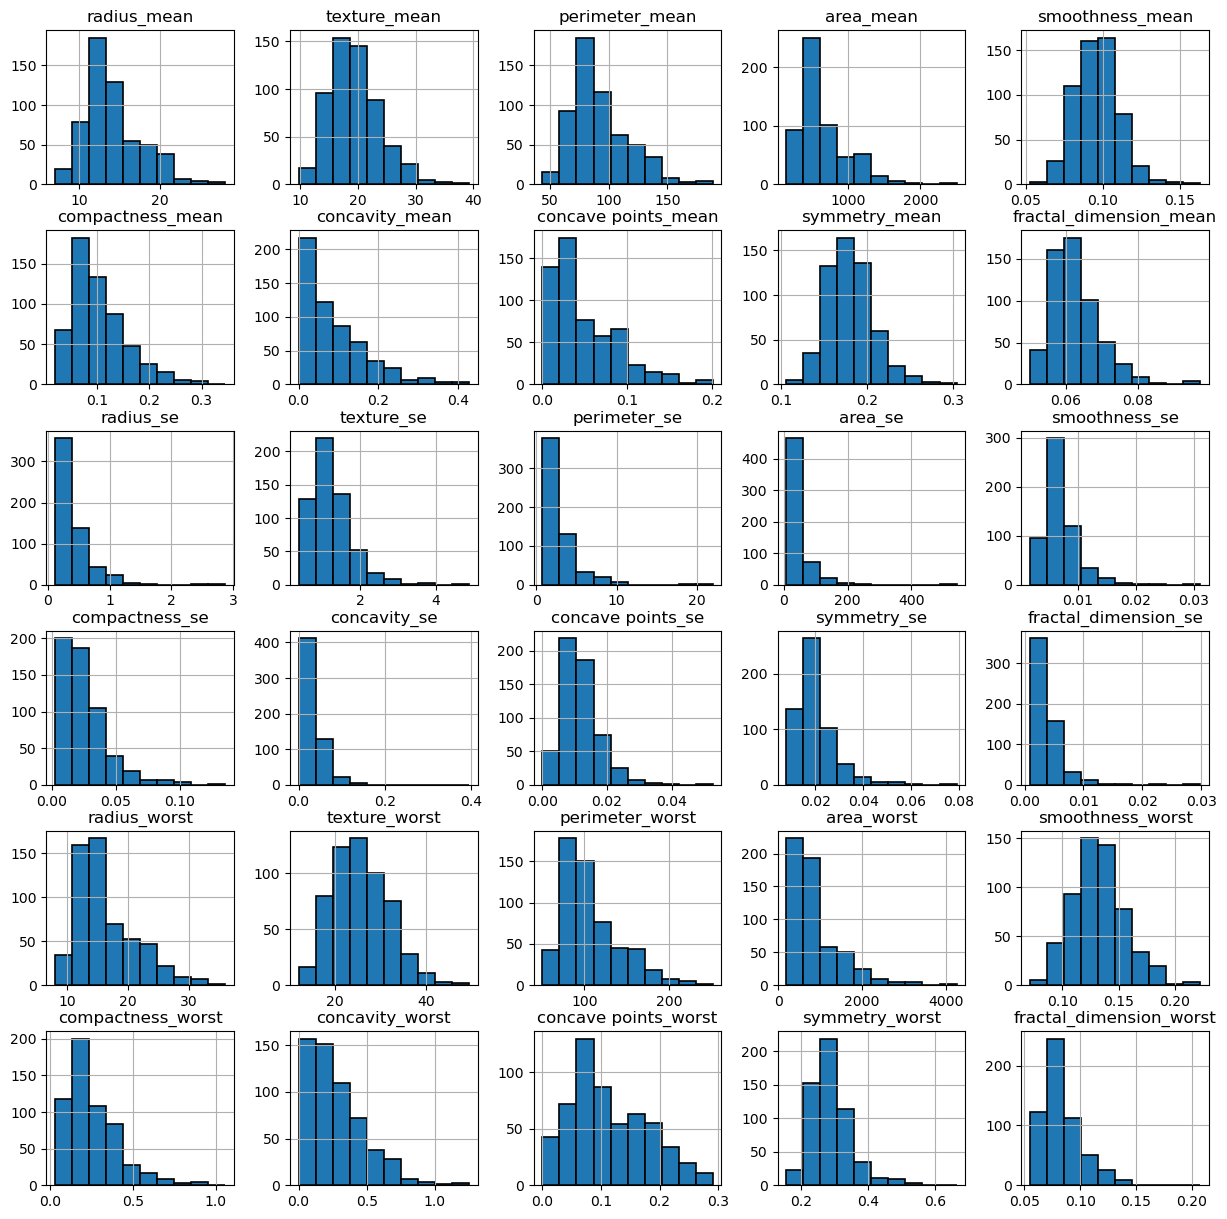

In [6]:
df.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [7]:
df.isnull().sum().sum()

0

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


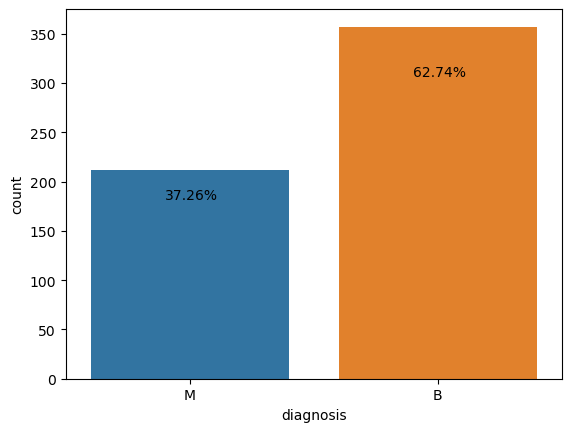

In [18]:
sns.countplot(df.diagnosis)
plt.text(x = -0.1,y=df.diagnosis.value_counts()[1]-30, s=str(round((df.diagnosis.value_counts()[1])*100/len(df.diagnosis),2)) + '%')
plt.text(x = 0.9,y=df.diagnosis.value_counts()[0]-50, s=str(round((df.diagnosis.value_counts()[0])*100/len(df.diagnosis),2)) + '%')
plt.show()

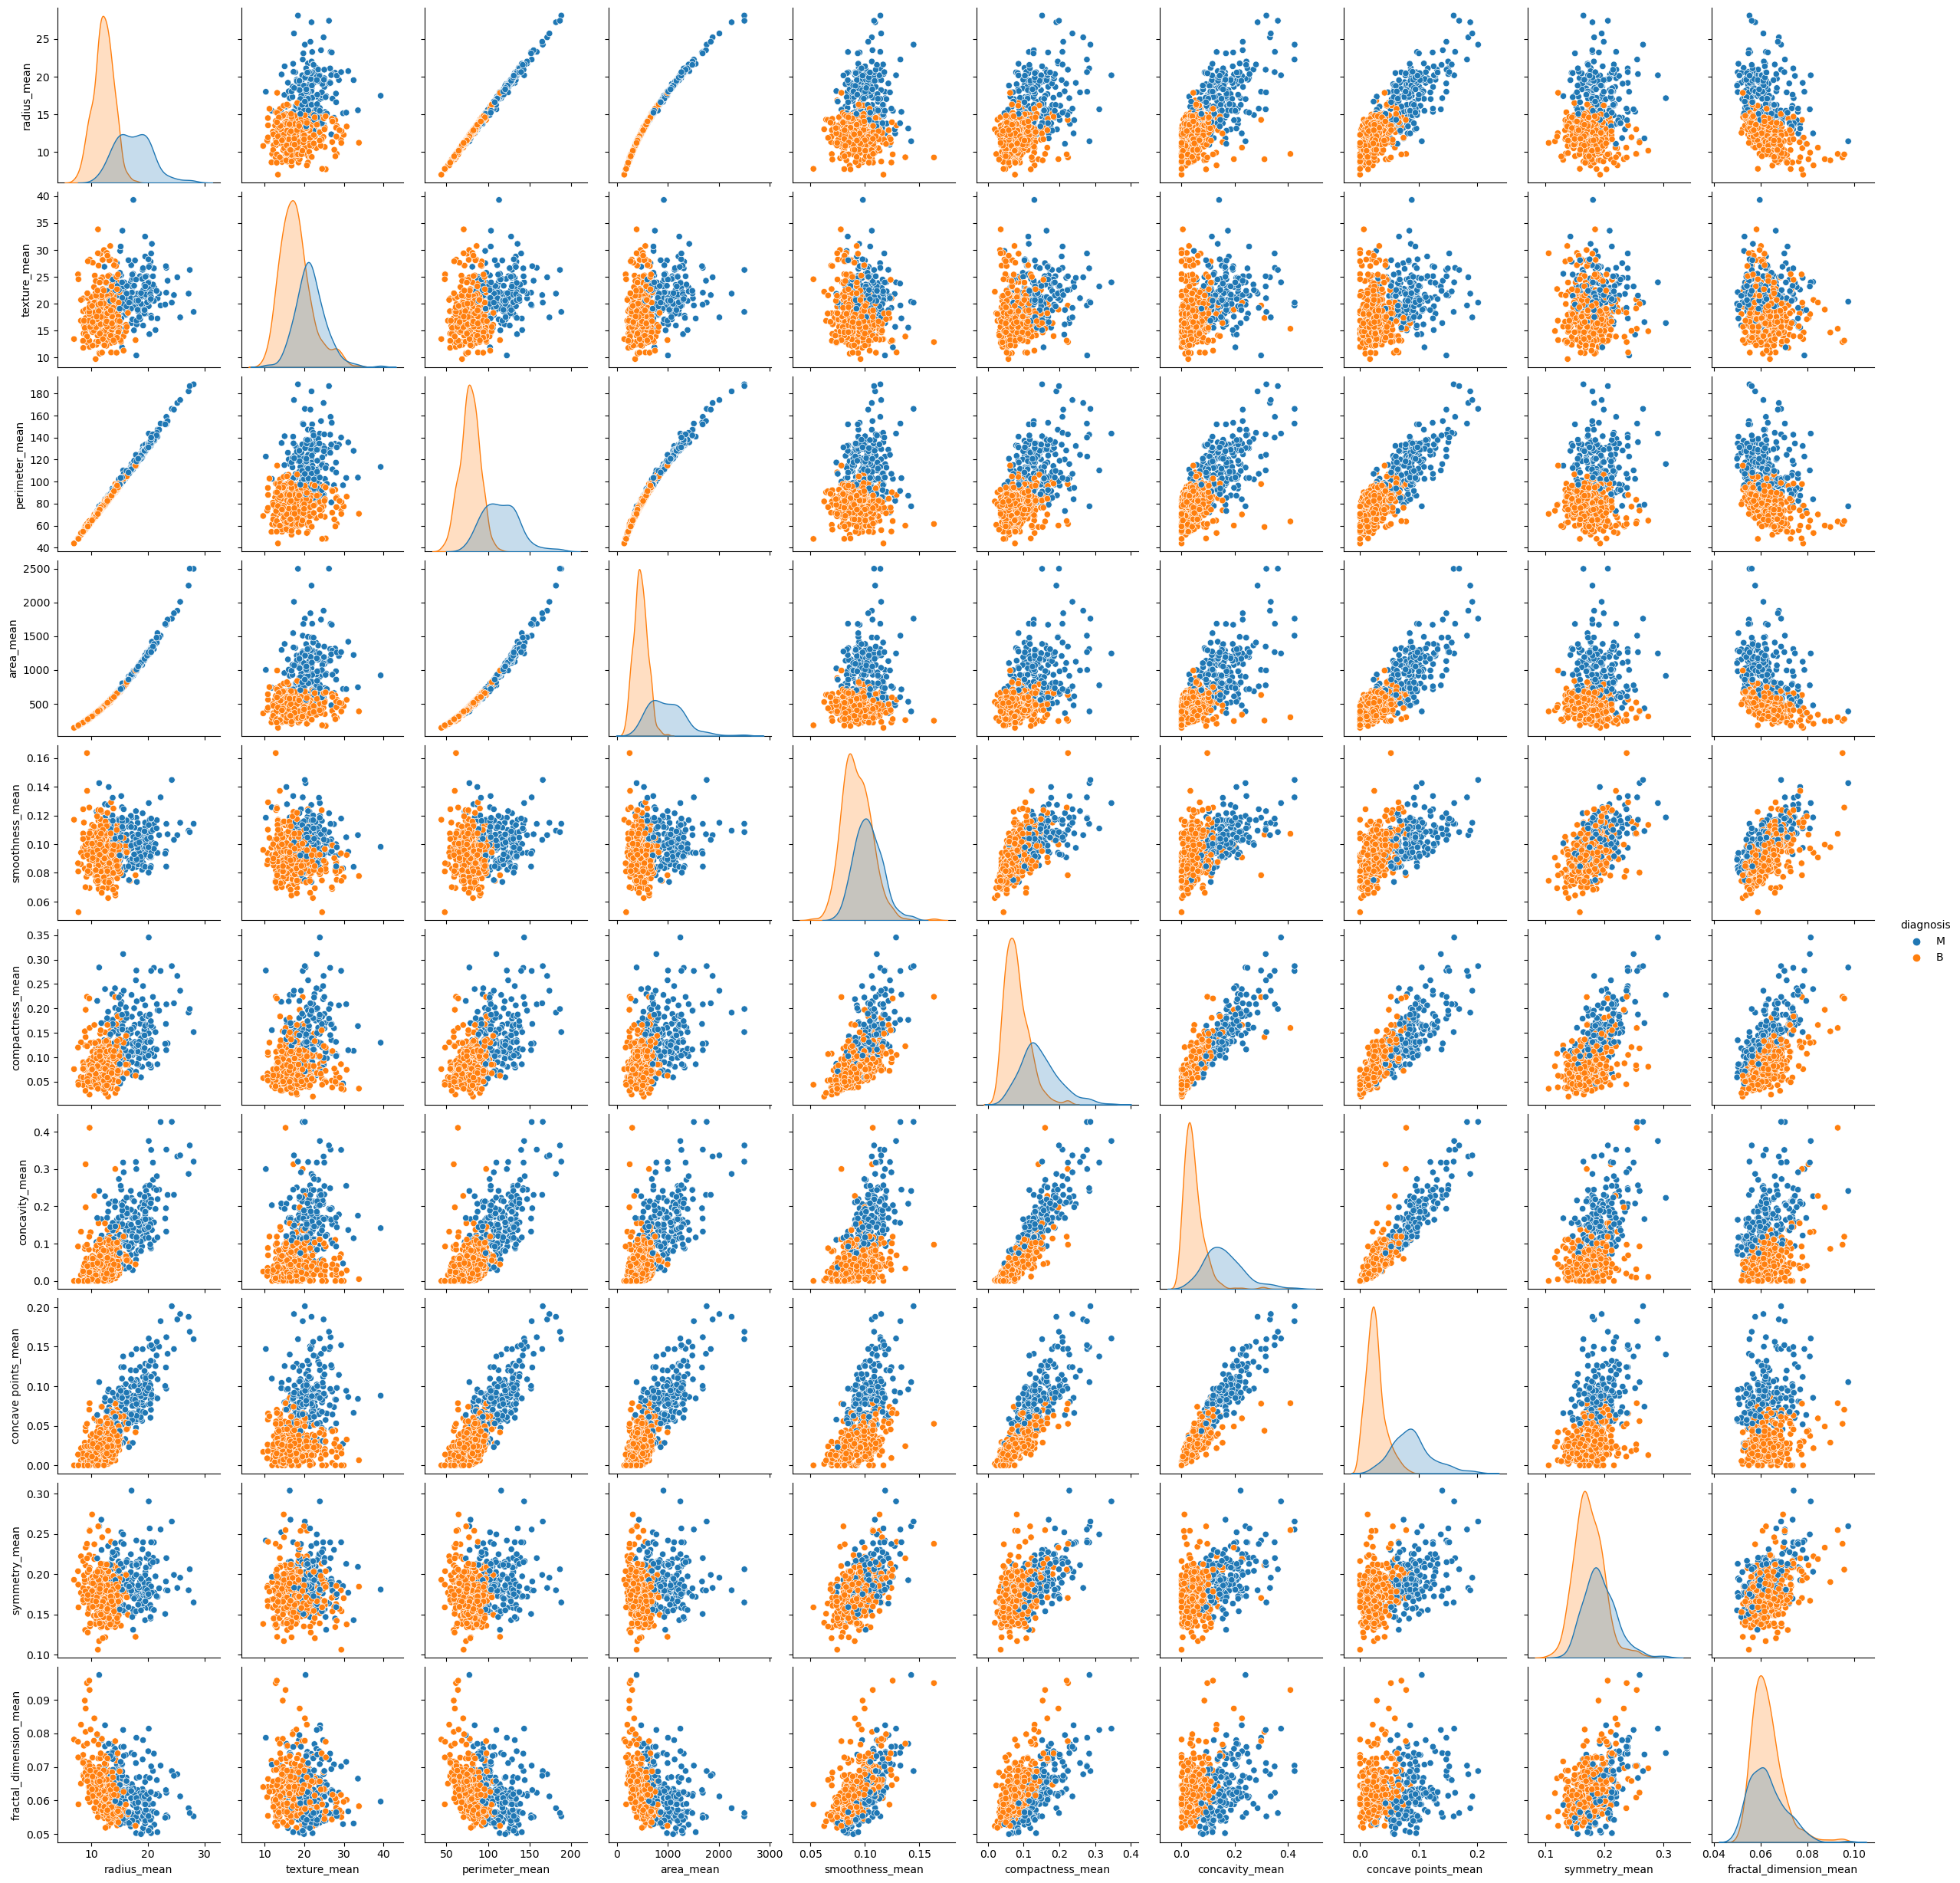

In [10]:
sns.pairplot(df, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

#### From the combinations of plots above, we cant distinguish the beningn amd malignant tumors based on all the 30 features.
so, we have to reduce the number of features using multi collinearity and dimensionality reduction

In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

#### From the above table radius, perimeter and area are highly corelated each other. so, we can drop the perimeter and area columns.


In [20]:
df = df.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst'], axis = 1)

In [21]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})

In [22]:
df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  ...  symmetry_se  fractal_dimension_se  radius_worst  \
0     1.0950  ...      0.03003              0.006193         25.38   
1     0.5435  ...      0.01389              0.003532         24.99   
2     0.7456  ...      0.02250              0.004571         23.57   
3     0.4956  ...      0.05963              0.009208         14.91   
4     0.7572  ...      0.01756              0.005115         22.54   

   texture_worst  smoothness_worst  compactness_worst  concavity_worst  \
0          17.33            0.1622             0.6656           0.7119   
1          23.41            0.1238             0.1866           0.2416   
2          25.53            0.1444             0.4245           0.4504   
3          26.50            0.2098             0.8663           0.6869   
4          16.67            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 25 columns]

In [23]:
x = df.copy(deep = True)
y = df[['diagnosis']]

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [25]:
x_scaled = ss.fit_transform(x)

In [26]:
from sklearn.decomposition import PCA

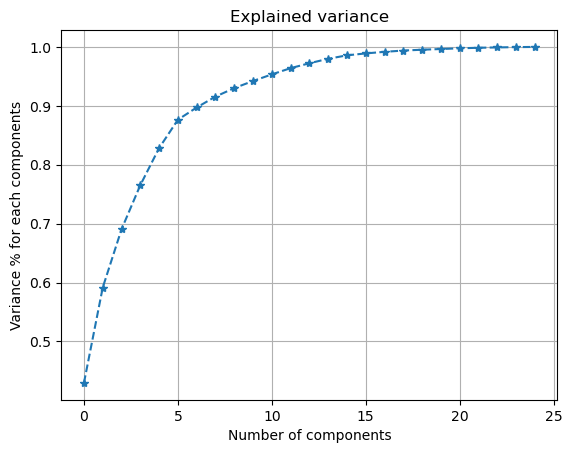

In [36]:
fig, ax = plt.subplots(1,1)
#fitting the pca algorithm with our data
pca=PCA().fit(x_scaled)
#plotting the cumulative summation of the explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = '*', linestyle = '--')
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')
ax.grid()
plt.show()

#### From above figure it seems that our components bends after approx. 5, so we select nearly 5 for 100% variance data.

In [37]:
pca = PCA(n_components = 5)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [38]:
print('shape before pca : ', x_scaled.shape)
print('shape after pca : ', x_pca.shape)

shape before pca :  (569, 25)
shape after pca :  (569, 5)


In [40]:
print(pca.components_)

[[ 2.22625790e-01  1.80987449e-01  1.05275524e-01  1.91172954e-01
   2.87189948e-01  2.87015807e-01  2.69500063e-01  1.86869311e-01
   1.43850231e-01  1.81559225e-01  3.09581443e-02  4.79061641e-02
   2.25581027e-01  2.01145459e-01  2.17298553e-01  7.32998300e-02
   1.60193504e-01  1.94677366e-01  1.13112958e-01  1.80462787e-01
   2.62385158e-01  2.71941835e-01  2.71639431e-01  1.70116250e-01
   2.05787238e-01]
 [-2.34623422e-01 -3.52914635e-01 -1.58845464e-01  1.31052737e-01
   4.30528143e-02 -5.73483016e-02 -1.63041500e-01  1.41242725e-01
   3.79809474e-01 -1.46685202e-01  1.32541136e-01  2.86004782e-01
   2.03018679e-01  1.70960931e-01  9.26752032e-02  2.45018950e-01
   3.08648551e-01 -3.50998959e-01 -1.66787490e-01  7.97971564e-02
   2.96908050e-03 -4.81583171e-02 -1.68081620e-01  4.08739782e-02
   1.92917391e-01]
 [-7.05456302e-03  1.04231923e-01  2.47584352e-01 -1.92391177e-01
  -6.07085396e-02  5.93869115e-02  3.36906139e-02 -9.92491269e-02
  -1.31000045e-01  2.75262227e-01  4.2

In [41]:
colnames = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'diagnosis']

#target data
diag = df.iloc[:,0:1]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)

Xy.head()

PC1       PC2       PC3       PC4       PC5  diagnosis
0   8.134915  0.777219 -2.531025 -2.609929 -1.353552        1.0
1   0.473009 -2.958533 -0.135410 -1.394030  0.061911        1.0
2   4.621467 -1.845616 -0.217051 -1.132710 -0.673471        1.0
3  10.525459  6.250460 -4.323514  2.108654 -1.843738        1.0
4   2.303684 -1.227922  0.909056 -3.300302 -0.796260        1.0

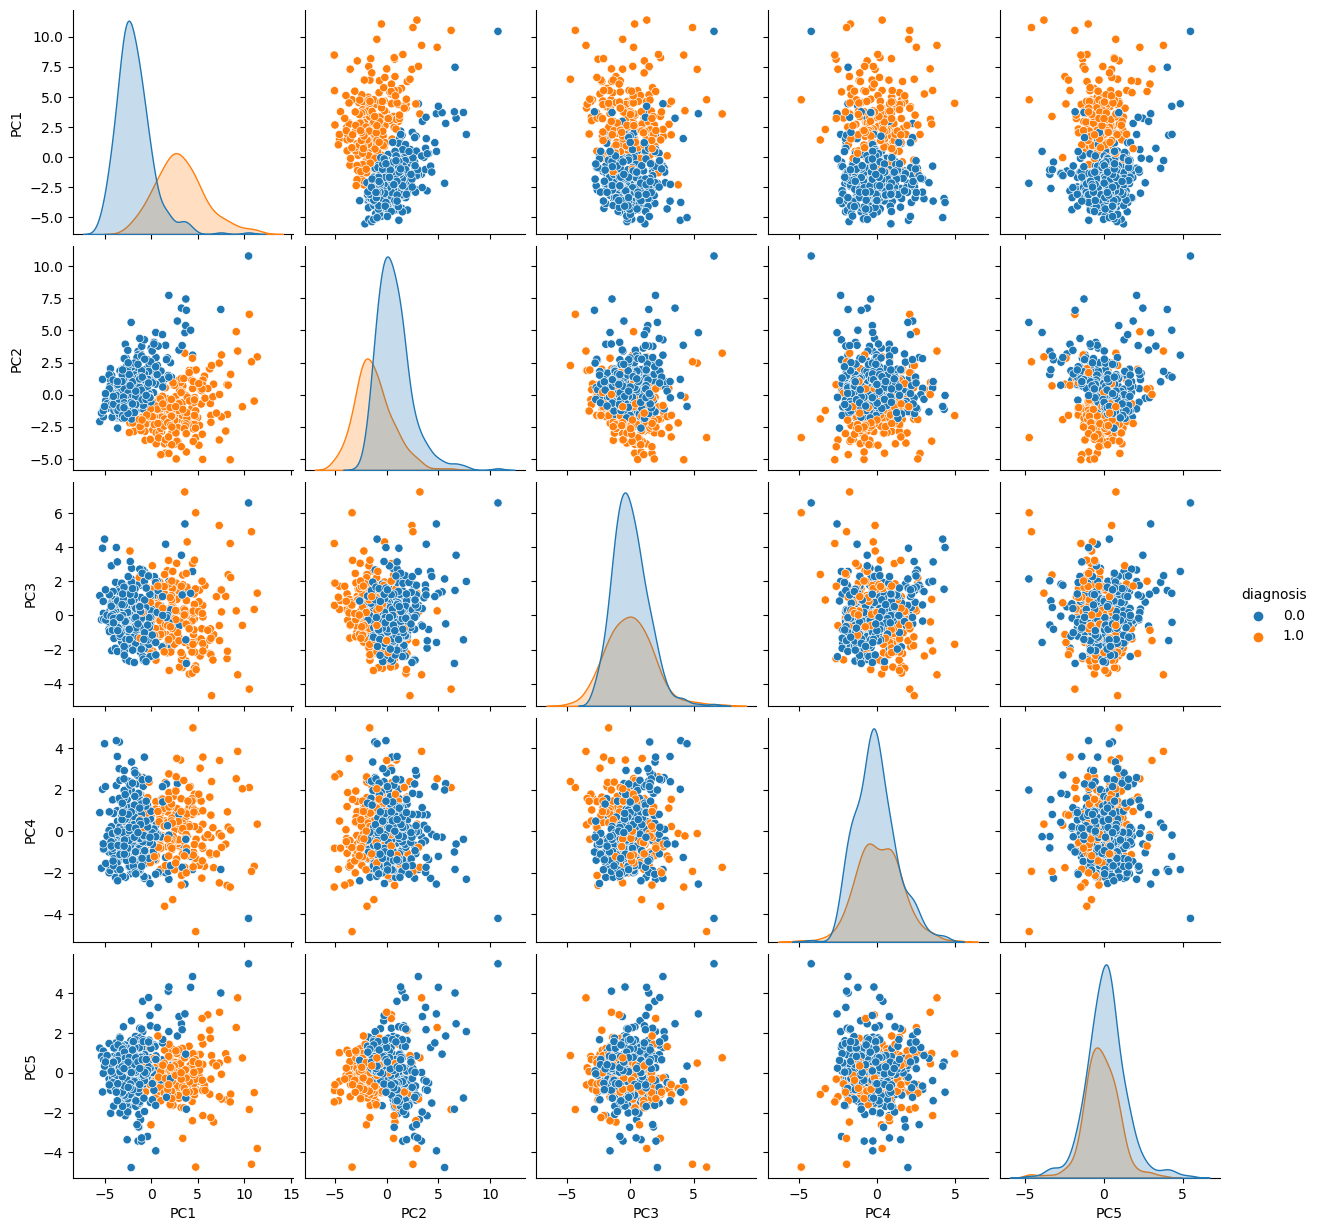

In [43]:
sns.pairplot(Xy, hue = 'diagnosis', vars = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

#### From the above plot, we can distinguish majority of the beningn and malignant tumors with PC1 & PC2 columns

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


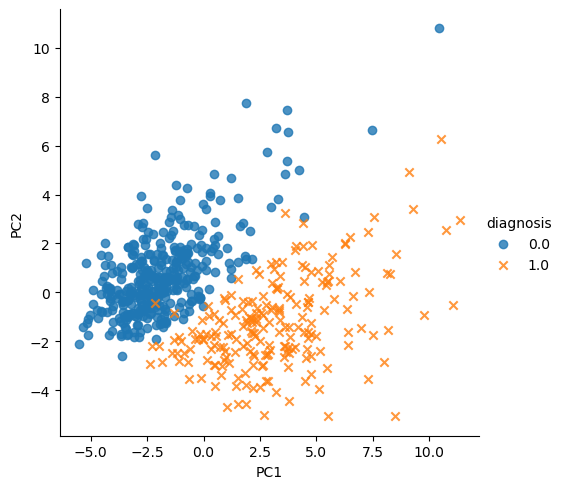

In [45]:
sns.lmplot("PC1", "PC2", hue = "diagnosis", data = Xy, fit_reg = False, markers = ["o", "x"])
plt.show()

In [46]:
Xy[['diagnosis']] == df[['diagnosis']]

diagnosis
0         True
1         True
2         True
3         True
4         True
..         ...
564       True
565       True
566       True
567       True
568       True

[569 rows x 1 columns]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [48]:
y = Xy[['diagnosis']]
Xy.drop(['diagnosis'], axis = 1, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(Xy, y,test_size = 0.3, random_state = 10)

In [49]:
svc = SVC()

In [50]:
svc.fit(x_train, y_train)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [51]:
y_pred = svc.predict(x_test)

#### Sensitivity, specificity and accuracy are described in terms of TP, TN, FN and FP.

Sensitivity = TP/(TP + FN) = (Number of true positive assessment)/(Number of all positive assessment)

Specificity = TN/(TN + FP) = (Number of true negative assessment)/(Number of all negative assessment)

Accuracy = (TN + TP)/(TN+TP+FN+FP) = (Number of correct assessments)/Number of all assessments)

precision(positive class) = TP/(TP + FP)

precision(negative class) = TN/(TN + FN)

In [52]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred)) 
print("recall or sensitivity : ", metrics.recall_score(y_test, y_pred))
print("f1: ", metrics.f1_score(y_test, y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))

accuracy:  0.9941520467836257
precision:  0.9833333333333333
recall or sensitivity :  1.0
f1:  0.9915966386554621
area under curve (auc):  0.9955357142857143


In [53]:
creport = metrics.classification_report(y_test, y_pred)
print("Classification report:\n",creport)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       112
         1.0       0.98      1.00      0.99        59

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



In [54]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


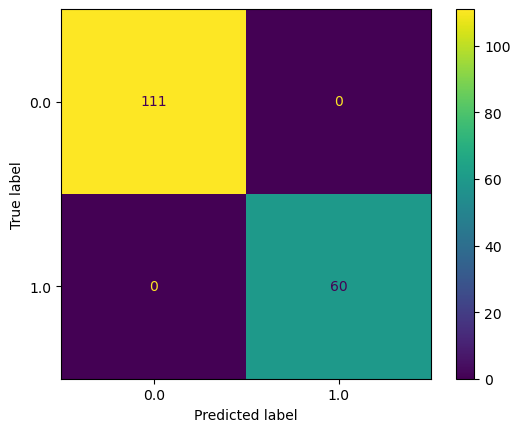

In [58]:
plot_confusion_matrix(svc, x_test, y_pred)

#### Hyper Parameters in svm

In [59]:
c = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]

kernels = ['poly', 'sigmoid', 'linear', 'rbf']

C_value = []
kernel_value = []
score = []

for i in range(len(c)):
    for j in kernels:
        model = SVC(C = c[i], kernel = j)
        x_train, x_test, y_train, y_test = train_test_split(Xy, y, test_size = 0.3, random_state = 10)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score.append(metrics.accuracy_score(y_test, y_pred))
        C_value.append(c[i])
        kernel_value.append(j)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [60]:
df_score = pd.DataFrame()
df_score['score'] = score
df_score['kernel'] = kernel_value
df_score['C_value'] = C_value

In [61]:
df_score.sort_values(['score'], ascending = False)

score   kernel  C_value
2   1.000000   linear      0.1
39  0.994152      rbf      2.0
11  0.994152      rbf      0.5
18  0.994152   linear      0.9
22  0.994152   linear      1.0
30  0.994152   linear      1.5
15  0.994152      rbf      0.7
14  0.994152   linear      0.7
31  0.994152      rbf      1.5
26  0.994152   linear      1.3
10  0.994152   linear      0.5
27  0.994152      rbf      1.3
35  0.994152      rbf      1.7
7   0.994152      rbf      0.3
23  0.994152      rbf      1.0
19  0.994152      rbf      0.9
34  0.988304   linear      1.7
6   0.988304   linear      0.3
38  0.988304   linear      2.0
3   0.988304      rbf      0.1
32  0.982456     poly      1.7
1   0.982456  sigmoid      0.1
36  0.982456     poly      2.0
28  0.976608     poly      1.5
24  0.970760     poly      1.3
20  0.964912     poly      1.0
5   0.964912  sigmoid      0.3
21  0.959064  sigmoid      1.0
17  0.959064  sigmoid      0.9
16  0.959064     poly      0.9
13  0.959064  sigmoid      0.7
9   0.959064  sigmoid      0.5
25  0.953216  sigmoid      1.3
29  0.953216  sigmoid      1.5
12  0.953216     poly      0.7
33  0.953216  sigmoid      1.7
37  0.953216  sigmoid      2.0
8   0.935673     poly      0.5
4   0.906433     poly      0.3
0   0.853801     poly      0.1